# Pandas Exercises

This exercise is concerned with baby names in the US between the years 2000 and 2018. The exercise tasks include exploratory data analysis and some data visualization. With these exercises, you will get to practice with some of the most commonly used Pandas features for hand-on data analytics.

Data source: catalog.data.gov

Inspiration for this exercise: PhantomInsights@github

The data set is available as a CSV file named "baby_names_2000.csv" in Canvas.

**Exercise 1:** Place this CSV file under the same directory where your Jupyter Notebook file is. 

Import Pandas as "pd" and NumPy as "np". 

Read the data into a Pandas data frame called `df`.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('baby_names_2000.csv')

**Exercise 2:** How many rows are there in this dataset?

In [2]:
df.shape[0]

624236

**Exercise 3:** How many columns does this dataset have?

In [3]:
df.shape[1]

4

**Exercise 4:** What are the names of columns in this dataset? Format the output as a Python list, please.

**Hint:** Use the `columns` attribute of `df` and cast the result to a Python list.

In [4]:
list(df.columns.values)

['year', 'name', 'gender', 'count']

**Exercise 5:** Display the first 10 rows.

In [5]:
df.head(10)

,year,name,gender,count
0,2000,Emily,F,25956
1,2000,Hannah,F,23082
2,2000,Madison,F,19968
3,2000,Ashley,F,17997
4,2000,Sarah,F,17702
5,2000,Alexis,F,17629
6,2000,Samantha,F,17265
7,2000,Jessica,F,15709
8,2000,Elizabeth,F,15099
9,2000,Taylor,F,15078


**Exercise 6:** Display the last 10 rows.

In [6]:
df.tail(10)

,year,name,gender,count
624226,2018,Zuber,M,5
624227,2018,Zubeyr,M,5
624228,2018,Zyell,M,5
624229,2018,Zyheem,M,5
624230,2018,Zykeem,M,5
624231,2018,Zylas,M,5
624232,2018,Zyran,M,5
624233,2018,Zyrie,M,5
624234,2018,Zyron,M,5
624235,2018,Zzyzx,M,5


**Exercise 7:** Replace the gender "M" with "B" for boy, and "F" with "G" for girl.

In [7]:
df['gender'] = df['gender'].replace({'M': 'B', 'F': 'G'})

**Exercise 8:** What is the earliest year?

In [8]:
df['year'].min()

2000

**Exercise 9:** What is the most recent year?

In [9]:
df['year'].max()

2018

**Exercise 10:** How many unique names are there regardless of gender?

**Hint:** Use the `nunique()` function.

In [10]:
df['name'].nunique()

68265

**Exercise 11:** How many unique names for boys?

In [11]:
df[df['gender'] == 'B']['name'].nunique()

30724

**Exercise 12:** How many unique names for girls?

In [12]:
df[df['gender'] == 'G']['name'].nunique()

43936

# Optional Exercises

**Exercise 13:** The *gender* variable is categorical with two levels: *B, G*. You will now define a new data frame called `pivot_df` by "spreading" these two values into two columns where the cell values will be the sum of all the counts over all the years. You need to have a unique name in each row. To be clear, your new data frame needs to have exactly three columns: *name, B, G*. This is called a **pivot table**. Once you define your new data frame, display the top 5 rows.

**Hint:** For this, you will need to use the `pivot_table()` function with the `np.sum` aggregation. In particular, you will need to run the line below.
```Python
pivot_df = df.pivot_table(index = 'name', columns = 'gender', values = 'count', aggfunc = np.sum)
```
After that, you will need to run the `dropna()` and `reset_index()` functions.


**Bonus:** Get rid of the columns' name on the top left corner. That is, set the data frame's columns' `name` attribute to "None".

In [13]:
pivot_df = df.pivot_table(index = 'name', columns = 'gender', values = 'count', aggfunc = np.sum)
pivot_df.dropna(inplace = True)
pivot_df.reset_index(inplace = True)
pivot_df.columns.name = None # this is to get rid of columns' name, "gender"
pivot_df.head()

,name,B,G
0,Aaden,4828.0,5.0
1,Aadi,851.0,16.0
2,Aadyn,516.0,16.0
3,Aalijah,212.0,134.0
4,Aaliyah,85.0,79254.0


**Exercise 14:** How many unique names are there that are gender-neutral (that is, names used for both boys and girls)? For more meaningful results, use names where both boy and girl counts are at least 1000.

**Hint:** Use your new pivot table from above and assign the query result to back to `pivot_df`.

In [14]:
# Unique names for gender neutral
pivot_df = pivot_df[(pivot_df['B'] >= 1000) & (pivot_df['G'] >= 1000)]
pivot_df.shape[0]

279

**Exercise 15:** For the pivot table, define a new column *Total* which is the sum of boy and girl name counts for each name. Set the new column's data type to an integer using the `astype()` function with the `int` option. Then display 10 randomly selected rows.

In [15]:
pivot_df['Total'] = pivot_df['B'] + pivot_df['G']
pivot_df['Total'] = pivot_df['Total'].astype(int)
pivot_df.sample(n=10)

,name,B,G,Total
2907,Joan,3265.0,1809.0,5074
2435,Isa,1474.0,1064.0,2538
2644,Jamison,9714.0,1170.0,10884
2051,Finley,9225.0,14307.0,23532
1387,Courtney,2555.0,31427.0,33982
5575,Skye,1198.0,13377.0,14575
1149,Carter,138633.0,4807.0,143440
297,Amari,16997.0,12594.0,29591
3191,Kamari,6459.0,3517.0,9976
5046,Reilly,2899.0,3348.0,6247


**Exercise 16:** What are the top 10 boy names?

**Hint:** First filter for boys in the `df` data frame (not `pivot_df`). Then use the `groupby()` function on the *names* column followed by the `sum()` function. 

Keep in mind that when an aggregation function such as `sum()` is called an a `groupby` object, it is applied to each group separately. 

Next, sort the resulting data frame by the *count* column in a descending order and finally get the top 10 rows.

In [16]:
df_m = df[df['gender'] == 'B']
df_m = df_m[['name', 'count']]
df_m = df_m.groupby('name')
df_m = df_m.sum()
df_m.sort_values('count', ascending = False, inplace = True)
df_m.reset_index(inplace = True)
df_m.head(10)

,name,count
0,Jacob,425864
1,Michael,384597
2,William,340194
3,Ethan,339287
4,Matthew,336999
5,Joshua,331180
6,Daniel,326682
7,Alexander,309239
8,Noah,307073
9,Joseph,300849


**Exercise 17:** How about the top 10 girl names?

In [17]:
df_f = df[df['gender'] == 'G']
df_f = df_f[['name', 'count']]
df_f = df_f.groupby('name')
df_f = df_f.sum()
df_f.sort_values('count', ascending = False, inplace = True)
df_f.reset_index(inplace = True)
df_f.head(10)

,name,count
0,Emma,358667
1,Emily,332839
2,Olivia,321581
3,Isabella,306218
4,Sophia,286197
5,Madison,285066
6,Abigail,260121
7,Ava,245496
8,Elizabeth,219243
9,Hannah,214378


**Exercise 18:** How about the top 10 gender-neutral names (after filtering for low-count names)?

**Hint**: Use the `pivot_df` data frame and sort it.

In [18]:
pivot_df.sort_values('Total', ascending = False, inplace = True)
pivot_df.head(10)

,name,B,G,Total
4354,Michael,384597.0,1121.0,385718
4634,Noah,307073.0,1660.0,308733
4083,Madison,1374.0,285066.0,286440
5247,Ryan,257898.0,11380.0,269278
3956,Logan,250011.0,15626.0,265637
1778,Dylan,228700.0,10625.0,239325
4225,Mason,236543.0,2020.0,238563
6034,Tyler,221702.0,5906.0,227608
2752,Jayden,206323.0,20046.0,226369
1282,Christian,220516.0,3962.0,224478


**Exercise 19 (Matplotlib):** Plot the number of baby boys and baby girls on the same plot as a function of years. The y-axis should be the number of babies and the x-axis should be the year. Make sure you have a meaningful title, correct x and y axis labels, and also a legend.

**Hint:** Define two new data frames using `df`, one for boys and one for girls. For each data frame, first group by the *year* variable and then use the `sum()` function. This will give you data frames with two columns each: `year` and `count`. You can directly pass these data frames into the `plot()` function. Make sure you define 'Boy' and 'Girl' plot labels for the `plot()` function calls. Use blue color for boys and red color for girls. Use a line width of 2 for both using the `lw` option.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

In [20]:
boy_df = df[df['gender'] == 'B'].groupby('year').sum()
girl_df = df[df['gender'] == 'G'].groupby('year').sum()
boy_df.reset_index().head()

,year,count
0,2000,1963202
1,2001,1942034
2,2002,1940525
3,2003,1974274
4,2004,1983722


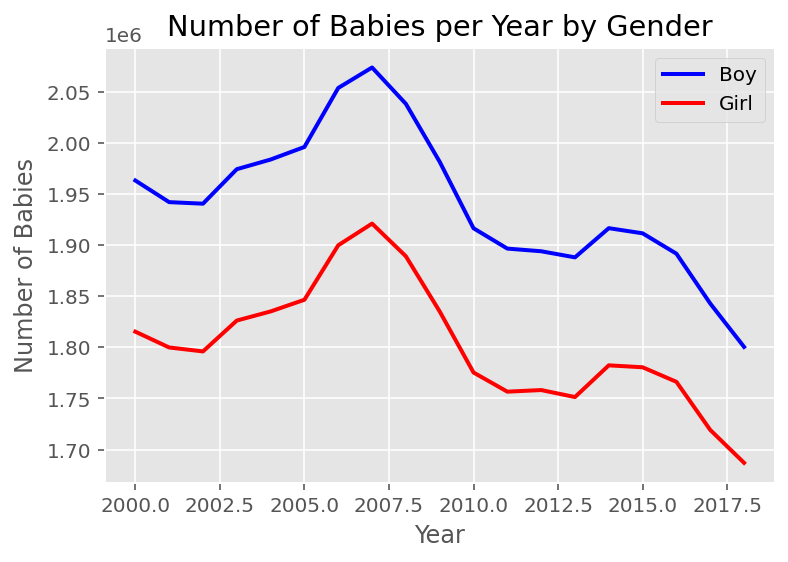

In [21]:
plt.plot(boy_df, label = 'Boy', color = 'blue', lw = 2)
plt.plot(girl_df, label = 'Girl', color = 'red', lw = 2)
plt.title('Number of Babies per Year by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Babies')
plt.legend()
plt.show();

**Exercise 20 (Matplotlib):** We are now interested in two cute baby names: Emma and Emily. Plot the number of baby girls (that is, boys excluded) with these names on the same plot as a function of time as two separate lines. The y-axis should be the number of babies and the x-axis should be the year. Make sure you have a meaningful title, correct x and y labels, and also a legend.

Which name seems to maintain its popularity over the years and which name seems to lose it?

In [22]:
df_emma =  df[(df['name'] == 'Emma') & (df['gender'] == 'G')]
df_emily = df[(df['name'] == 'Emily') & (df['gender'] == 'G')]

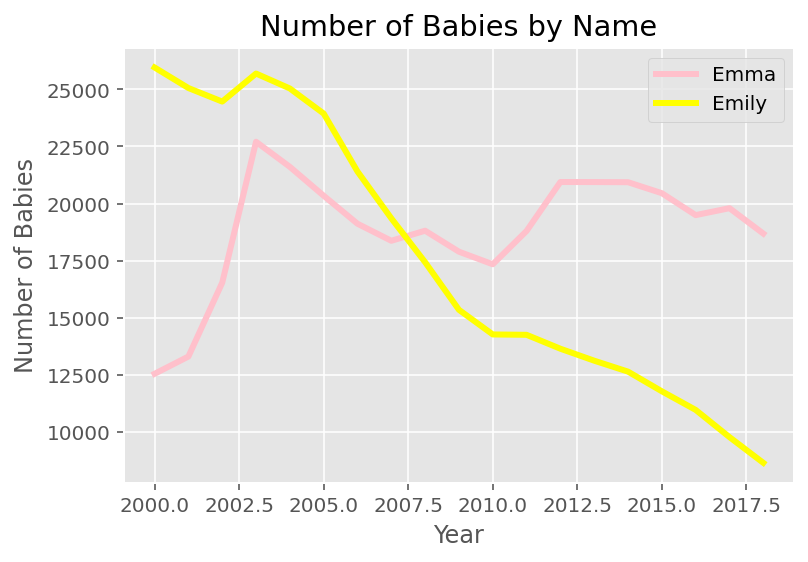

In [23]:
plt.plot(df_emma['year'], df_emma['count'], label = 'Emma', color = 'pink', lw = 3)
plt.plot(df_emily['year'], df_emily['count'], label = 'Emily', color = 'yellow', lw = 3)

plt.title('Number of Babies by Name')
plt.xlabel('Year')
plt.ylabel('Number of Babies')
plt.legend()
plt.show();

***
www.featureranking.com